<a href="https://colab.research.google.com/github/Pavanibollineni/FMML_2023/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

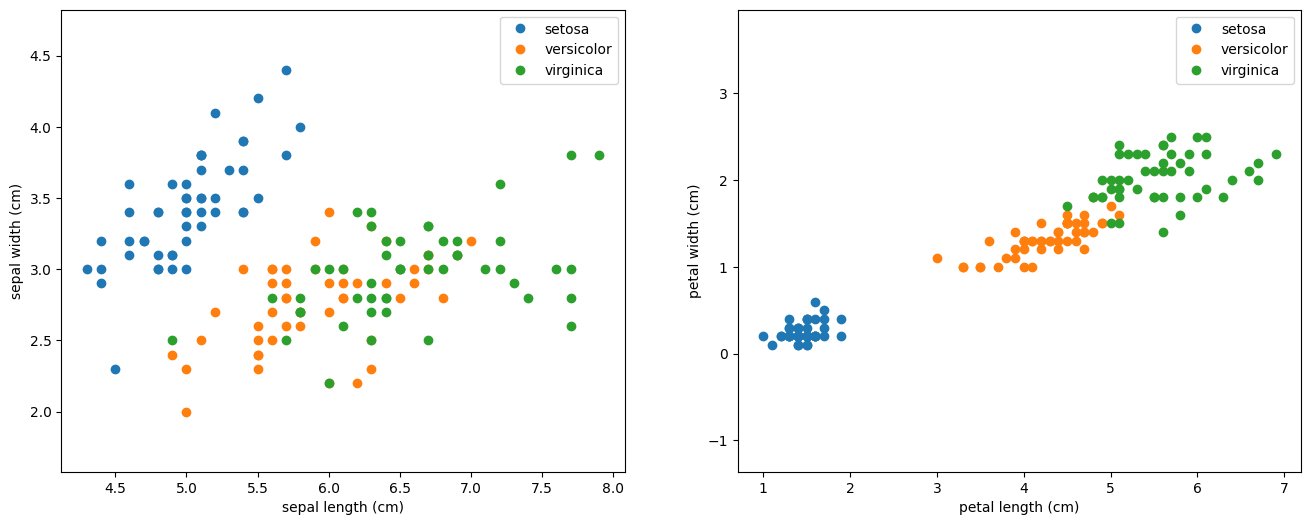

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:01<00:00, 90.07it/s]


# Plot training progress

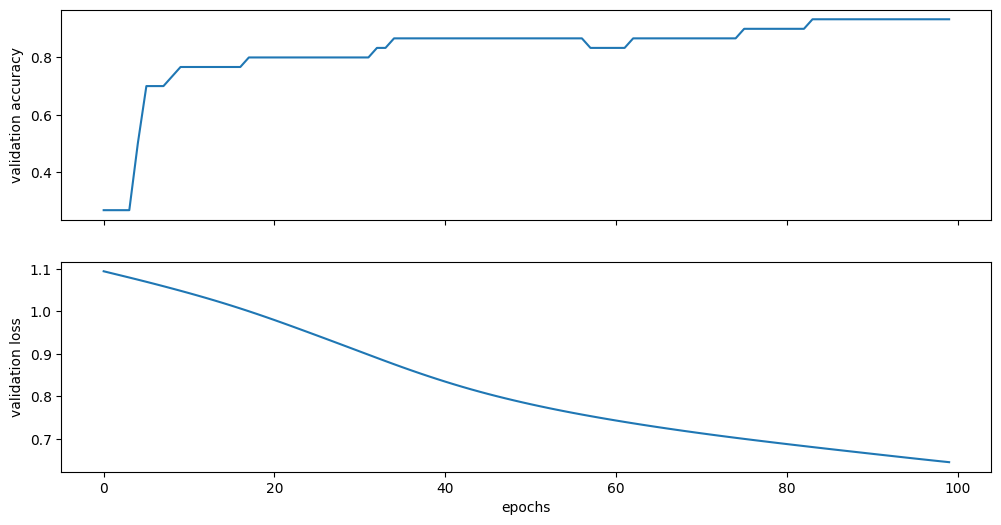

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

**Single hidden layer:**


With just one hidden layer, CNNs can still capture basic features in images such as edges and textures, thanks to the convolutional layers.
Parameter efficiency is maintained, as CNNs can learn relevant features with fewer parameters compared to ANNs, even with a single hidden layer.
The spatial hierarchy preserved by CNNs enables them to handle spatially structured data like images effectively.


**Multiple hidden layers:**  
Adding more hidden layers allows CNNs to learn increasingly complex and abstract features, making them capable of representing high-level concepts and semantics within images.
The hierarchical nature of CNNs becomes more pronounced with multiple hidden layers, facilitating the extraction of features at different levels of abstraction.
Despite the increase in model complexity, CNNs can still maintain parameter efficiency due to weight sharing and local connectivity, unlike ANNs, which would require exponentially more parameters to achieve similar representational power.


**Deep architectures:**

Deep CNN architectures, with many hidden layers, have demonstrated superior performance in image classification tasks compared to shallow architectures.
Deep CNNs can automatically learn intricate patterns and representations from raw pixel values, eliminating the need for handcrafted feature engineering.
Techniques like residual connections, skip connections, and batch normalization help mitigate issues like vanishing gradients and enable the training of very deep networks, further enhancing the representational capacity of CNNs.

**Fewer neurons:**

In CNNs, reducing the number of neurons in the hidden layer still allows for effective feature extraction from images due to the convolutional and pooling layers.
Despite having fewer neurons, CNNs can capture relevant patterns and features within the input image efficiently, thanks to weight sharing and parameter reuse across different spatial locations.
Parameter efficiency is maintained, as CNNs can learn to represent complex image features with relatively fewer parameters compared to ANNs, even with a smaller number of neurons in the hidden layer.

**More neurons:**

Increasing the number of neurons in the hidden layer of CNNs enables them to learn more diverse and detailed features from the input images.
With more neurons, CNNs have a higher capacity to model complex relationships and patterns within the data, potentially leading to better performance on image classification tasks.
However, increasing the number of neurons also increases the model's computational complexity and memory requirements, which may pose challenges for deployment on resource-constrained devices.


**Comparison with ANNs:**


Compared to ANNs, CNNs can achieve similar or better performance in image classification tasks with fewer neurons in the hidden layer, thanks to their ability to exploit spatial locality and hierarchical feature representations.
ANNs require a significantly larger number of neurons in the hidden layer to achieve comparable performance, as they lack the inherent structure and parameter sharing mechanisms of CNNs.

**ReLU (Rectified Linear Unit):**


ReLU is one of the most commonly used activation functions in CNNs due to its simplicity and effectiveness.
ReLU introduces non-linearity to the network, allowing CNNs to learn complex patterns and relationships within images.
ReLU activation helps alleviate the vanishing gradient problem during training, enabling more efficient and stable learning.

**Leaky ReLU:**

Leaky ReLU is a variant of ReLU that allows a small, non-zero gradient for negative inputs.
This small gradient helps address the "dying ReLU" problem, where neurons could become inactive during training, by allowing them to still update their weights even for negative inputs.
Leaky ReLU can potentially lead to faster convergence and improved performance compared to standard ReLU, especially in deeper networks.

**ELU (Exponential Linear Unit):**

ELU is another activation function that aims to address the limitations of ReLU, particularly its lack of negative values for negative inputs.
ELU introduces negative values for negative inputs, allowing the network to learn robust representations and potentially reducing the risk of dead neurons.
ELU has been shown to achieve better performance than ReLU in some cases, particularly when dealing with noisy data or deeper networks.